# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)
import seaborn as sns
# import sklearn.linear_model as sklin
# import sklearn.metrics as skmet
# import sklearn.model_selection as skmod
# import sklearn.preprocessing as skprep

In [2]:
from Functions import get_ages_cols, name_from_index, get_category_cols, get_param_names

## Directories etc.

In [3]:
data_save_path = "C:/Users/maria/MEGAsync/SLCNdata/Meta/all_data"
plot_save_path = "C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots"
if not os.path.exists(plot_save_path):
    os.makedirs(plot_save_path)

# Get data

In [4]:
all_data = pd.read_csv(os.path.join(data_save_path, 'all_data.csv'), index_col=0)
all_data_z = pd.read_csv(os.path.join(data_save_path, 'all_data_z.csv'), index_col=0)
all_data_long = pd.read_csv(os.path.join(data_save_path, 'all_data_long.csv'), index_col=0)
all_data_long_z = pd.read_csv(os.path.join(data_save_path, 'all_data_long_z.csv'), index_col=0)
# fit_pd_all = pd.read_csv(os.path.join(data_save_path, 'fit_pd_all.csv'), index_col=0)
ages_dir = "C:/Users/maria/MEGAsync/SLCNdata/SLCNinfo2.csv"
ages = pd.read_csv(os.path.join(ages_dir))

In [5]:
param_cols = list(set([c for c in all_data.columns for p in get_param_names() if p in c]))
acc_rt_cols = [c for c in all_data.columns if ('ACC' in c) or ('RT' in c)]
ages_cols = get_ages_cols()
category_cols = get_category_cols()

# Dendrograms

In [6]:
all_data_d = all_data.copy()
all_data_d['PreciseYrs'] = all_data_d['PreciseYrs'].round()
all_data_d = all_data_d.set_index('PreciseYrs')
all_data_d

,ID,BMI,Gender,meanT,PDS,age_group,bf_ACC,bf_RT,bf_RTsd,bf_ACC_delta,...,ps_n_switches,ps_WLS,ps_LWS,ps_criterion_trial,bf_ACC_first3trials,bf_asymptote,bf_learning_slope,bf_intercept,bf_prew,bf_delay
PreciseYrs,,,,,,,,,,,,,,,,,,,,,
9.0,17,18.200751,2.0,NaN,2.50,0.25,0.56667,1.33950,0.69630,-0.325,...,8,0.111111,1.000000,3.666667,0.333333,0.59077,-0.053115,0.255267,-0.318745,-0.108595
13.0,18,16.157863,2.0,NaN,2.25,0.50,0.80000,1.19270,0.53170,0.375,...,8,0.870968,0.904762,4.222222,0.250000,0.96463,-2.393200,1.930379,1.195528,-0.120319
15.0,20,17.433768,1.0,120.649667,2.80,0.75,0.85000,0.99265,0.52117,0.300,...,8,1.000000,0.950000,4.000000,0.500000,0.98363,-2.137900,2.352541,1.329053,-0.168739
16.0,22,22.709959,1.0,147.334443,3.00,1.00,0.73333,1.51800,1.03220,0.175,...,7,0.708333,0.933333,4.250000,0.416667,0.82375,-1.937400,1.152193,0.528728,-0.163958
11.0,23,15.147686,1.0,27.712900,1.00,0.50,0.81667,1.62240,0.85927,0.125,...,8,0.304348,1.000000,3.714286,0.666667,0.88317,-1.730200,1.548147,0.690841,-0.190590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22.0,465,NaN,2.0,NaN,NaN,2.00,0.74167,1.11640,0.52359,0.275,...,8,0.777778,1.000000,3.625000,0.666667,0.75862,3.626000,1.238689,0.644662,-0.135437
20.0,466,NaN,1.0,NaN,NaN,2.00,0.60833,0.87618,0.32142,0.025,...,8,0.785714,1.000000,3.750000,0.583333,0.63033,-1.718600,0.566666,0.213814,-0.238006
19.0,467,NaN,2.0,NaN,NaN,2.00,0.80000,1.29200,0.83115,-0.050,...,7,0.173913,1.000000,4.000000,0.750000,0.80872,-0.662550,1.276838,0.174681,-0.118256


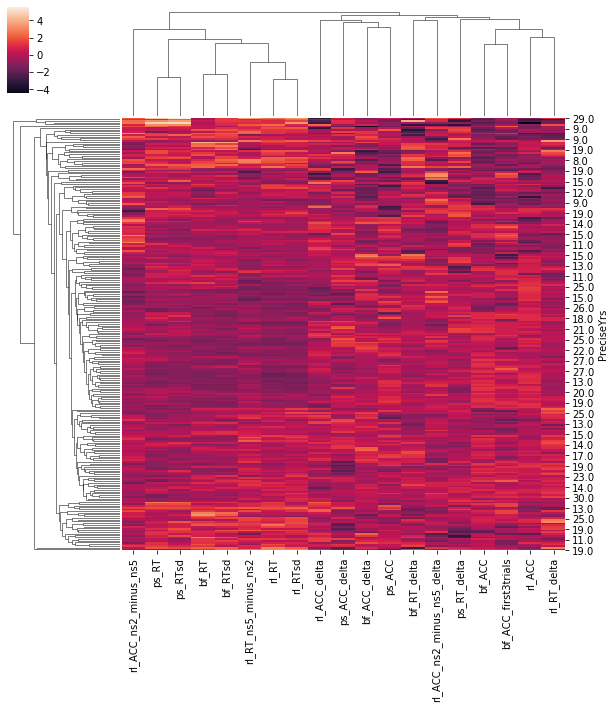

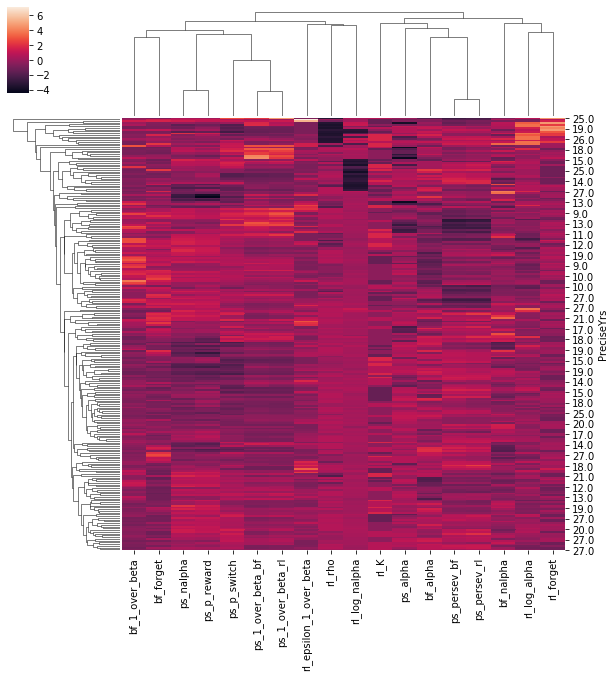

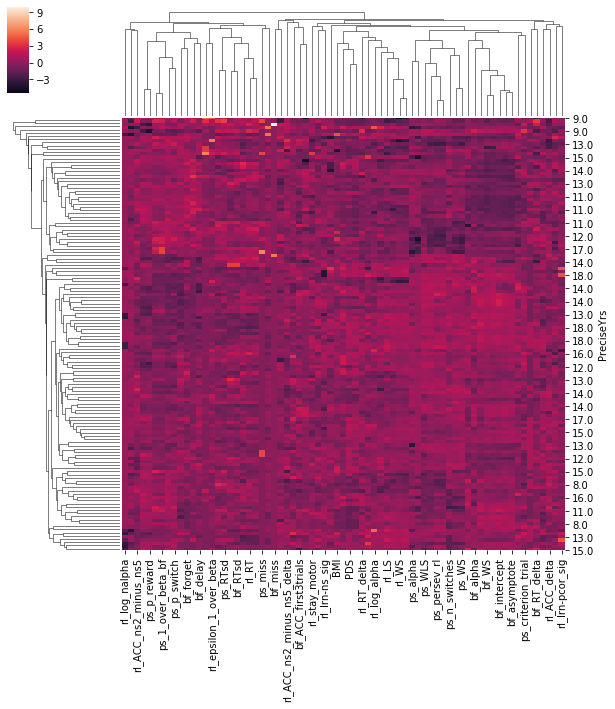

In [7]:
sns.clustermap(all_data_d[acc_rt_cols].dropna(), z_score=1)
plt.savefig(os.path.join(plot_save_path, '6_DendrogramAccRt.png'))
sns.clustermap(all_data_d[param_cols].dropna(), z_score=1)
plt.savefig(os.path.join(plot_save_path, '6_DendrogramPar.png'))
sns.clustermap(all_data_d.dropna(), z_score=1)
plt.savefig(os.path.join(plot_save_path, '6_DendrogramBeh.png'))

# tSNE

In [8]:
# Show participants in 2D space
tsne_dat = TSNE(n_components=2).fit_transform(z_dat.dropna())
index = all_data.reset_index().drop(columns=ages_cols[1:]).dropna().ID
tsne_pd = pd.DataFrame(tsne_dat, columns=['tSNE1', 'tSNE2'], index=index).reset_index()
tsne_pd = tsne_pd.merge(ages[['ID', 'PreciseYrs', 'Gender', 'meanT']])

NameError: name 'TSNE' is not defined

In [ ]:
gg.options.figure_size = (5, 4)
g = (gg.ggplot(tsne_pd, gg.aes('tSNE1', 'tSNE2', color='PreciseYrs'))
 + gg.geom_point()
)
g.save(os.path.join(plot_save_path, '4TsneParticipants.png'))
g

In [ ]:
tsne_long = tsne_pd.melt(id_vars=['ID', 'PreciseYrs', 'Gender', 'meanT'])
g = (gg.ggplot(tsne_long, gg.aes('PreciseYrs', 'value'))
 + gg.geom_point()
 + gg.geom_smooth()
 + gg.facet_grid('~ variable')
)
g.save(os.path.join(plot_save_path, '4TsneParticipants_.png'))
g

In [ ]:
# Show measures in 2D space
tsne_dat = TSNE(n_components=2).fit_transform(z_dat.dropna().T)
tsne_pd = pd.DataFrame(tsne_dat, columns=['tSNE1', 'tSNE2'], index=z_dat.columns).reset_index()
tsne_pd['task'] = tsne_pd['index'].apply(lambda x : x[:2])
tsne_pd['param_name'] = tsne_pd['index'].apply(name_from_index)
tsne_pd['ACC_RT'] = tsne_pd['index'].apply(name_from_index, names=['ACC', 'RT'])
tsne_pd['param_bool'] = tsne_pd['index'].apply(bool_from_index)
tsne_pd

In [ ]:
gg.options.figure_size = (5, 4)
g = (gg.ggplot(tsne_pd, gg.aes('tSNE1', 'tSNE2', color='task'))
 + gg.geom_point()
)
g.save(os.path.join(plot_save_path, '4TsneFeaturesBeh_task.png'))
g

# Transforming RLWM regression weights

In [ ]:
all_data['rl_lrn-fix'].describe()
all_data['rl_lrn-fix_sig'].describe()
zscore(all_data['rl_lrn-fix']).describe()

In [ ]:
x = np.arange(-30, 30, 0.1)
# x = np.arange(-10, 10, 0.01)
# dat = pd.DataFrame({'x': x, 'y': 3 *sigmoid(x/3)})
# dat = pd.DataFrame({'x': x, 'y': sigmoid(x)})
dat = pd.DataFrame({'x': x, 'y': sigmoid(zscore(x))})
dat
(gg.ggplot(dat, gg.aes('x', 'y')) +
 gg.geom_point()
)

In [ ]:
# all_data['rl_lrn-fix_sig'] = sigmoid(zscore(all_data['rl_lrn-fix']))
all_data['rl_lrn-fix_sig'] = sigmoid(all_data['rl_lrn-fix'])
# all_data['rl_lrn-fix_sig'] = 50 * sigmoid(all_data['rl_lrn-fix'] / 50)
# all_data['rl_lrn-fix_sig'] = all_data['rl_lrn-fix_sig'].median() * sigmoid(all_data['rl_lrn-fix'] / all_data['rl_lrn-fix_sig'].median())

(gg.ggplot(all_data, gg.aes('rl_lrn-fix', 'rl_lrn-fix_sig')) +
 gg.geom_point()
)

In [ ]:
dat = all_data#[all_data['rl_lrn-fix'] < 50]
(gg.ggplot(dat, gg.aes('PreciseYrs', 'rl_lrn-fix_sig'))
 + gg.geom_point()
 + gg.geom_smooth()
)

In [ ]:
dat = all_data[all_data['rl_lrn-fix'] < 50]
(gg.ggplot(dat, gg.aes('PreciseYrs', 'rl_lrn-fix'))
 + gg.geom_point()
 + gg.geom_smooth()
)

In [ ]:
(gg.ggplot(all_data, gg.aes('PreciseYrs', 'rl_lrn-ns'))
 + gg.geom_point()
)

In [ ]:
(gg.ggplot(all_data, gg.aes('PreciseYrs', 'rl_lrn-pcor'))
 + gg.geom_point()
)

In [ ]:
(gg.ggplot(all_data, gg.aes('PreciseYrs', 'rl_lrn-pinc'))
 + gg.geom_point()
)